21l 5654
Question 1

Big Data lab 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # import make_blobs dataset from scikit-learn
from sklearn.cluster import DBSCAN # import DBSCAN clustering algorithm from scikit-learn
# Generate sample dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)
# create 1000 data points in 2 dimensions with 3 clusters using make_blobs function from scikit-learn
# Run DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) # create an instance of DBSCAN with parameters
epsilon=0.5 
min_samples=5
dbscan.fit(X) # fit DBSCAN model to the data
# Get cluster labels
labels = dbscan.labels_ # get cluster labels from DBSCAN model

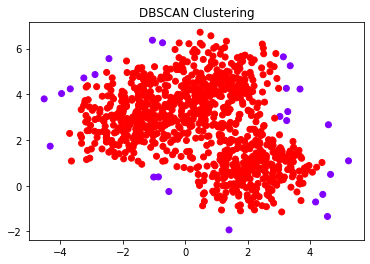

In [2]:
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow') # plot the data points with different colors fordifferent clusters
plt.title('DBSCAN Clustering') # set the title of the plot
plt.show() # show the plot

Question 2

DbScan Algorithm

In [7]:
def euclidean_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [4]:
def get_neighbors(X, point, eps):
    neighbors = []
    for i in range(len(X)):
        if euclidean_dist(X[i], X[point]) <= eps:
            neighbors.append(i)
    return neighbors

In [5]:
def expand_cluster(X, labels, point, neighbors, eps, min_pts, cluster_id):
    labels[point] = cluster_id
    i = 0
    
    while i < len(neighbors):
        n = neighbors[i]
        if labels[n] != -1:
            i += 1
            continue
        
        labels[n] = cluster_id
        new_neighbors = get_neighbors(X, n, eps)
        
        if len(new_neighbors) >= min_pts:
            neighbors += new_neighbors
        
        i += 1

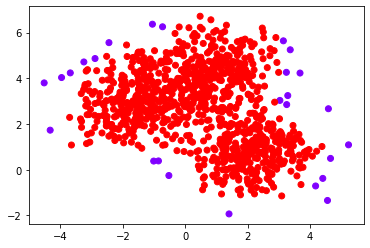

In [8]:
def dbscan(X, eps, min_pts):
    
    labels = [-1] * len(X)#unvisited points 
    
    core_pts = []
    #core points
    for point in range(len(X)):
        neighbors = get_neighbors(X, point, eps)
        if len(neighbors) >= min_pts:
            core_pts.append(point)
    
    #boundary points
    cluster_id = 0
    for point in core_pts:
        if labels[point] == -1:
            neighbors = get_neighbors(X, point, eps)
            expand_cluster(X, labels, point, neighbors, eps, min_pts, cluster_id)
            cluster_id += 1
    
   #noise points
    for point in range(len(X)):
        if labels[point] == -1:
            labels[point] = -1
    
    return labels

X,y =make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)

# Apply DBSCAN
labels = dbscan(X, eps=0.5, min_pts=5)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.show()
